In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import glob

In [2]:
model_file = 'tos_Omon_IPSL-CM6A-LR_historical_r12i1p1f1_gn_185001-201412.nc'

In [3]:
ds = xr.open_dataset(model_file)

/home/asarker3/.conda/envs/clim_data/lib/python3.10/site-packages/xarray/backends/plugins.py:65: RuntimeWarning: Engine 'gini' loading failed:
cannot import name 'deprecated' from 'typing_extensions' (/home/asarker3/.conda/envs/clim_data/lib/python3.10/site-packages/typing_extensions.py)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


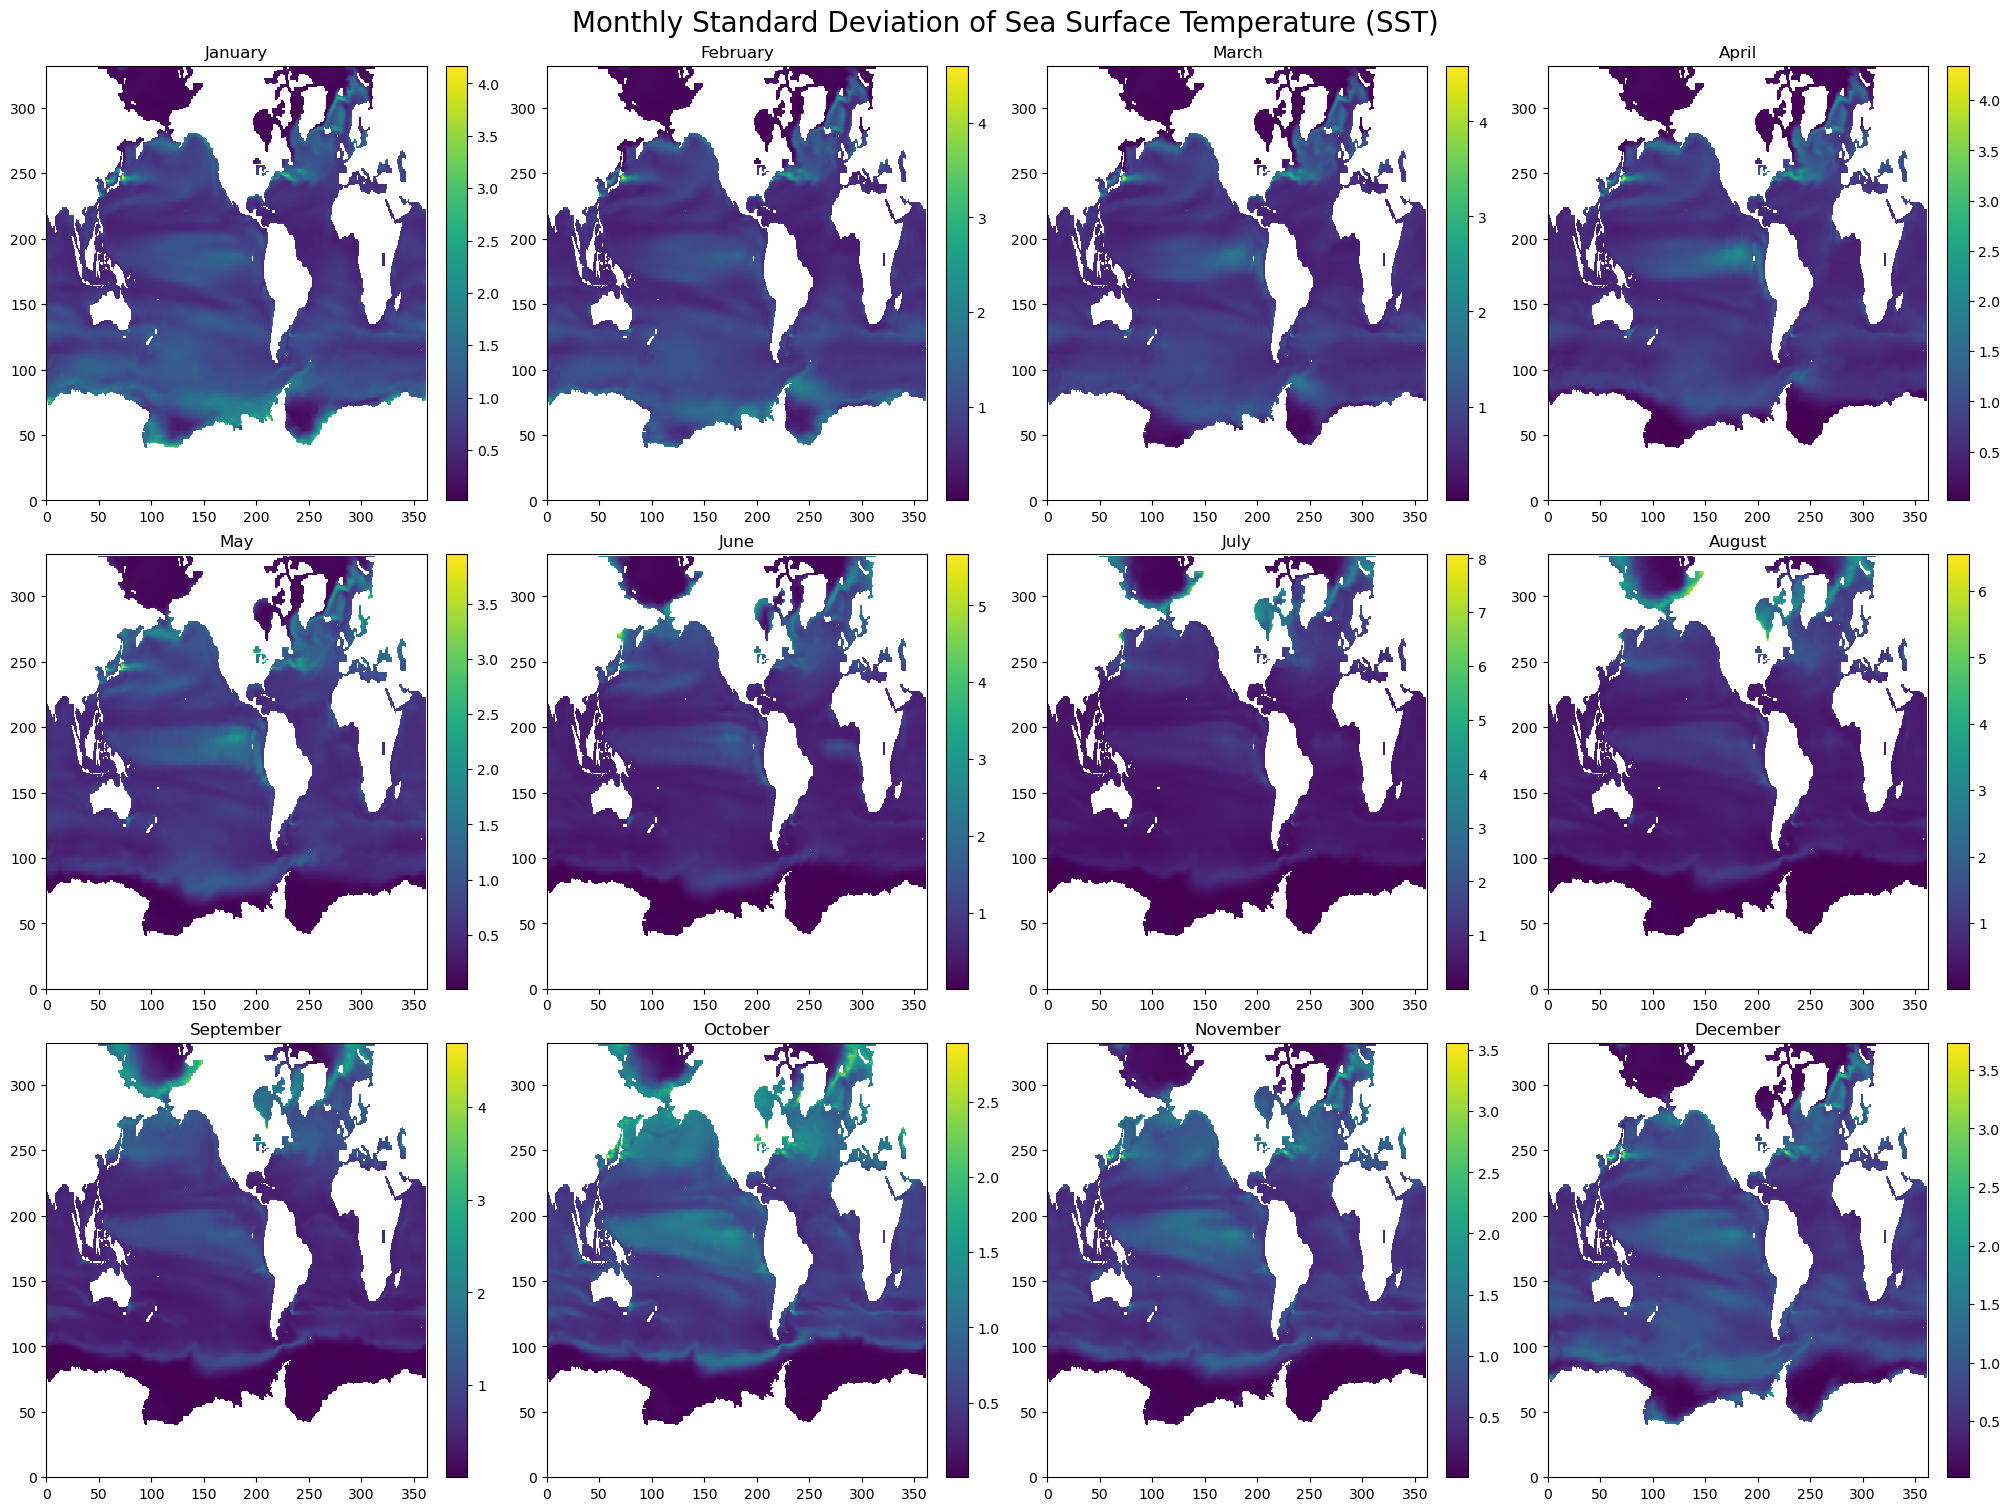

In [6]:
fig, axs = plt.subplots(3, 4, figsize=(20, 15), constrained_layout=True)

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

for i in range(12):

    month_data = ds.sel(time=ds['time'].dt.month == (i+1))
    month_std = month_data.std(dim='time')
    ax = axs[i // 4, i % 4]  # Access the subplot (row, col)
    c = ax.pcolormesh(month_std['tos'], cmap='viridis', shading='auto')
    ax.set_title(month_names[i])
    fig.colorbar(c, ax=ax, orientation='vertical')

fig.suptitle('Monthly Standard Deviation of Sea Surface Temperature (SST)', fontsize=20)

plt.show()